## Exploaratory Data Analysis

### 1.1 Load the data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import random
import pytz
from datetime import datetime
from pytz import timezone
import pytz

In [25]:
full_data = pd.read_csv('../data/full_data.csv',parse_dates =["Date"])

In [26]:
full_data.head()

,OrderId,UserId,RestaurantId,Date,Rating,Comments,Address,Count,ItemId,Price,ViewCount,Name,Description,SearchVector,Type
0,8,113,110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",1,211,15.0,0.0,Tableside Spinach Salad,NaN,'almond':8 'babi':4 'bacon':11 'jack':10 'mont...,Main
1,8,113,110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",1,218,27.0,0.0,King Crab,NaN,'blanc':9 'buerr':8 'caper':7 'char':3 'chilli...,Main
2,293,4,121,2020-05-13 01:20:59.267256,NaN,NaN,NaN,1,440,14.0,1097.0,Joojeh Kabab With Rice,One skewer of chicken breast marinated with yo...,'bbq':14 'chicken':11 'joojeh':1 'juic':9 'kab...,Main
3,294,3,121,2020-05-13 17:34:35.519326,NaN,NaN,NaN,1,455,1.5,9.0,Regular Coffee,NaN,'coffe':2 'regular':1,Drink
4,297,142,121,2020-05-14 00:08:48.756423,NaN,NaN,NaN,1,540,9.9,485.0,Kashk Bademjan,"Barbequed eggplant, lentils, fried onions, gar...",'bademjan':2 'bbq':8 'egg':10 'eggplant':6 'ga...,Main


In [27]:
full_data['Cost'] = full_data['Count'] * full_data ['Price']
full_data['Month'] = full_data['Date'].dt.month_name()
full_data['Day'] = full_data['Date'].dt.day_name()
full_data['Hour'] = (full_data['Date'].dt.hour - 8)

In [28]:
# After converting UTC to Pacific time, fix the negative hours
full_data['Hour'] = full_data['Hour'].apply(lambda x : x + 24 if x < 0 else x)

In [29]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24109 entries, 0 to 24108
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderId       24109 non-null  int64         
 1   UserId        24109 non-null  int64         
 2   RestaurantId  24109 non-null  int64         
 3   Date          24109 non-null  datetime64[ns]
 4   Rating        1757 non-null   float64       
 5   Comments      355 non-null    object        
 6   Address       409 non-null    object        
 7   Count         24109 non-null  int64         
 8   ItemId        24109 non-null  int64         
 9   Price         20972 non-null  float64       
 10  ViewCount     24109 non-null  float64       
 11  Name          24109 non-null  object        
 12  Description   14025 non-null  object        
 13  SearchVector  24109 non-null  object        
 14  Type          24109 non-null  object        
 15  Cost          20972 non-null  float6

### 1.2 Staff Management by Sales Volume

In [30]:
full_data.RestaurantId.value_counts()

1029    16451
121      3281
1034     2600
299      1748
1048       17
1040        9
110         3
Name: RestaurantId, dtype: int64

In [31]:
# lets keep just the restauarnts that have enough orders.
filter = (full_data.RestaurantId == 121) | (full_data.RestaurantId == 299) | (full_data.RestaurantId == 1029) | (full_data.RestaurantId == 1034)
full_data = full_data[filter]

In [32]:
full_data.groupby(['RestaurantId'])['Count','Cost'].sum()

/var/folders/pm/804wbvdx4lz30mqcr3mys38r0000gn/T/ipykernel_16020/1463236335.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  full_data.groupby(['RestaurantId'])['Count','Cost'].sum()


,Count,Cost
RestaurantId,,
121,4329,48214.32
299,2087,24798.15
1029,19400,149600.60
1034,3263,14885.35


In [33]:
# replace the restaurant Id just for convinient 
full_data.RestaurantId.replace({121 : 'A' ,299 : 'B',1029 : 'C',1034 : 'D'}, inplace= True)

In [34]:
data = full_data[['RestaurantId','Date','Count','Cost','Month','Day','Hour']]
data.set_index("Date", inplace = True)

In [35]:
data.head()

,RestaurantId,Count,Cost,Month,Day,Hour
Date,,,,,,
2020-05-13 01:20:59.267256,A,1,14.0,May,Wednesday,17
2020-05-13 17:34:35.519326,A,1,1.5,May,Wednesday,9
2020-05-14 00:08:48.756423,A,1,9.9,May,Thursday,16
2020-05-14 00:08:48.756423,A,1,12.0,May,Thursday,16
2020-05-14 00:46:28.274449,A,1,15.0,May,Thursday,16


In [36]:
# grouped_weekly = data.groupby('RestaurantId').resample('W')['Count','Cost'].sum()

In [37]:
grouped_daily = data.groupby('RestaurantId').resample('D')
grouped_daily = grouped_daily['Day'].agg('first')
grouped_daily

RestaurantId  Date      
A             2020-05-13    Wednesday
              2020-05-14     Thursday
              2020-05-15         None
              2020-05-16         None
              2020-05-17         None
                              ...    
D             2021-09-27       Monday
              2021-09-28         None
              2021-09-29    Wednesday
              2021-09-30     Thursday
              2021-10-01       Friday
Name: Day, Length: 1948, dtype: object

In [38]:
grouped_monthly= data.groupby('RestaurantId').resample('M')
grouped_monthly = grouped_monthly['Month'].agg('first')
grouped_monthly

RestaurantId  Date      
A             2020-05-31          May
              2020-06-30         June
              2020-07-31         July
              2020-08-31       August
              2020-09-30    September
                              ...    
D             2021-06-30         June
              2021-07-31         July
              2021-08-31       August
              2021-09-30    September
              2021-10-31      October
Name: Month, Length: 69, dtype: object

<AxesSubplot:xlabel='RestaurantId'>

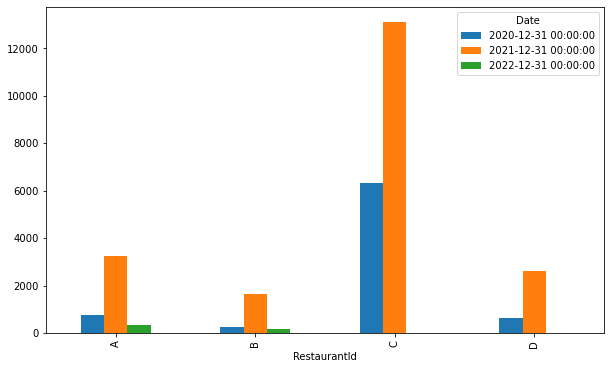

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
data.groupby('RestaurantId').resample('Y')['Count'].sum().unstack().plot(kind ='bar', ax=ax)

<AxesSubplot:xlabel='RestaurantId'>

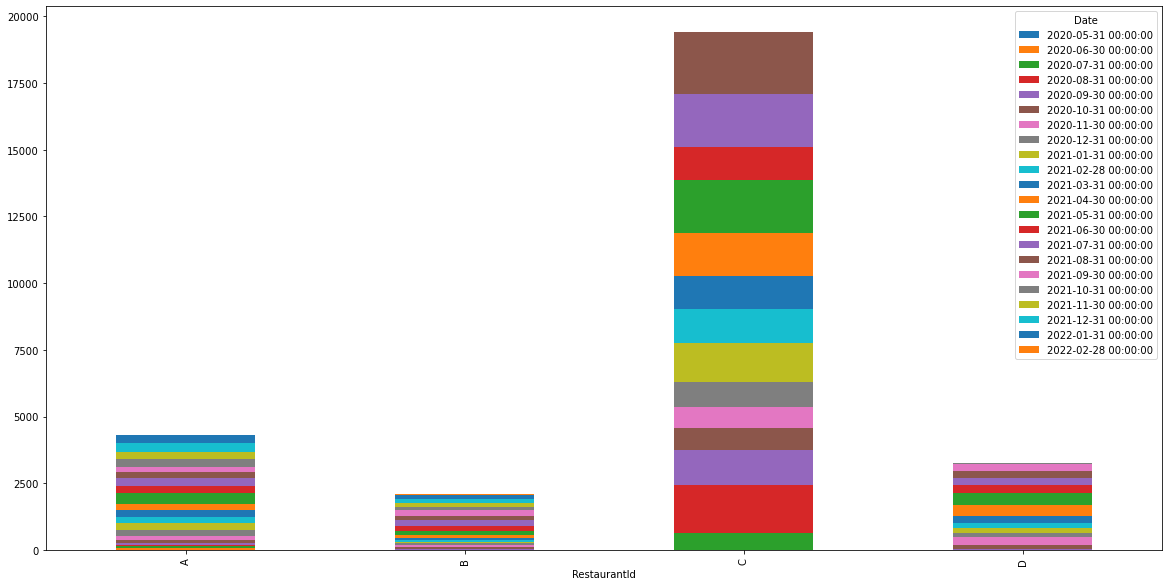

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
data.groupby('RestaurantId').resample('M').sum()['Count'].unstack().plot(kind ='bar',ax=ax,stacked=True)

### Explor better visualization

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24080 entries, 2020-05-13 01:20:59.267256 to 2022-02-02 02:49:32.497647
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RestaurantId  24080 non-null  object 
 1   Count         24080 non-null  int64  
 2   Cost          20943 non-null  float64
 3   Month         24080 non-null  object 
 4   Day           24080 non-null  object 
 5   Hour          24080 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.3+ MB


In [44]:
res_1 = data[data.RestaurantId == "A"]
res_2 = data[data.RestaurantId == "B"]
res_3 = data[data.RestaurantId == "C"]
res_4 = data[data.RestaurantId == "D"]

res_list = [res_1,res_2,res_3,res_4]

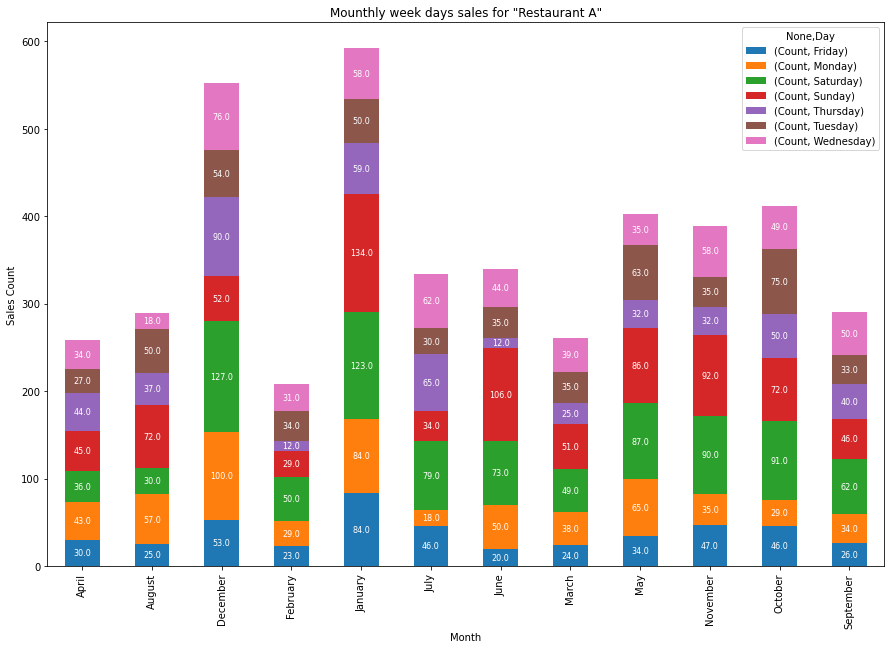

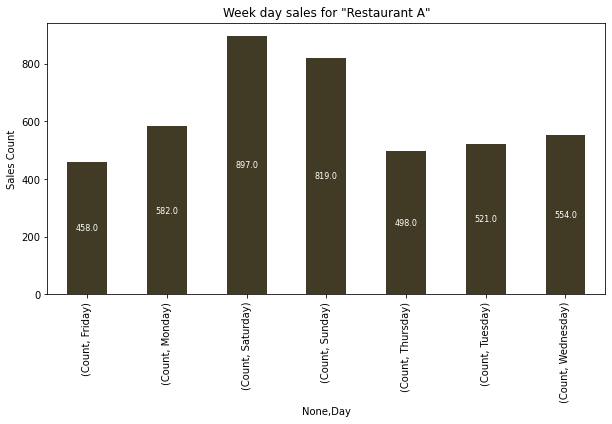

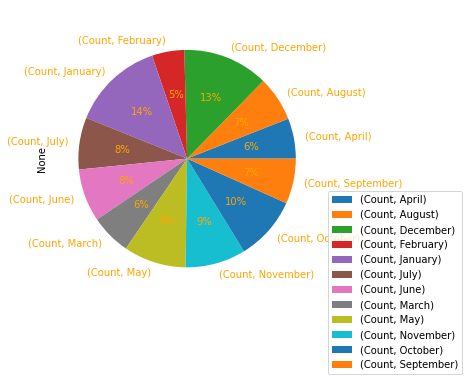

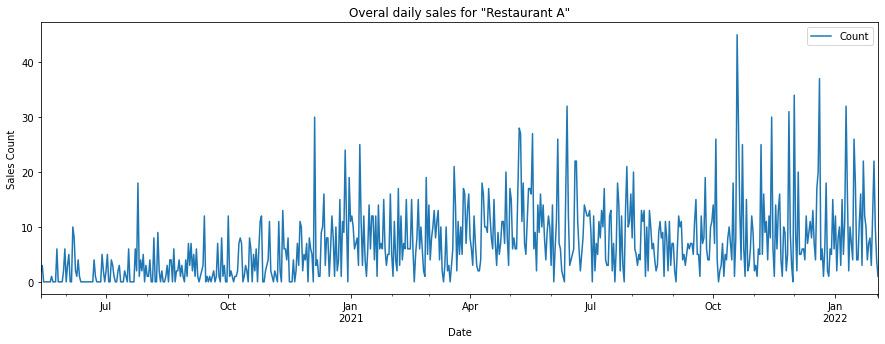

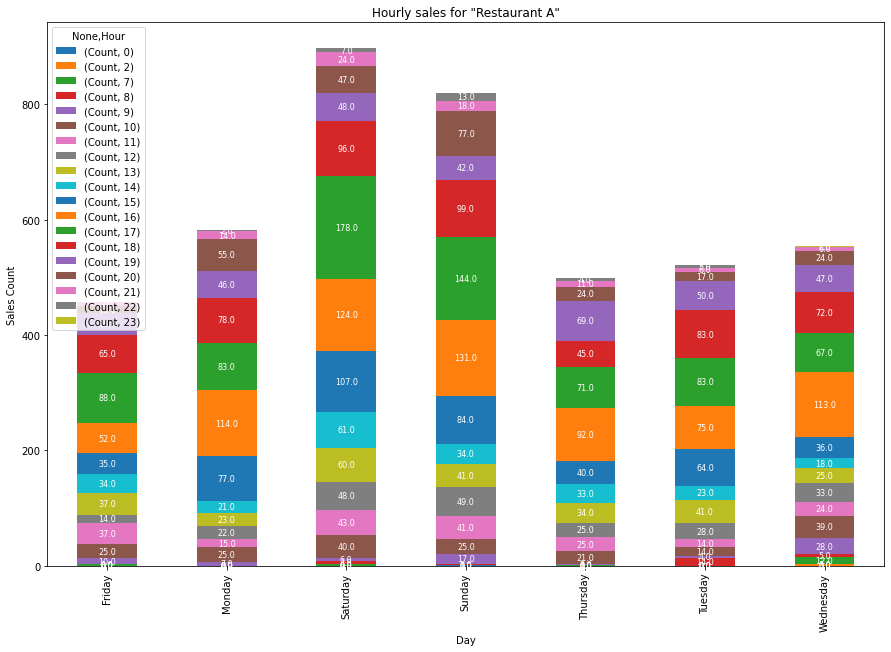

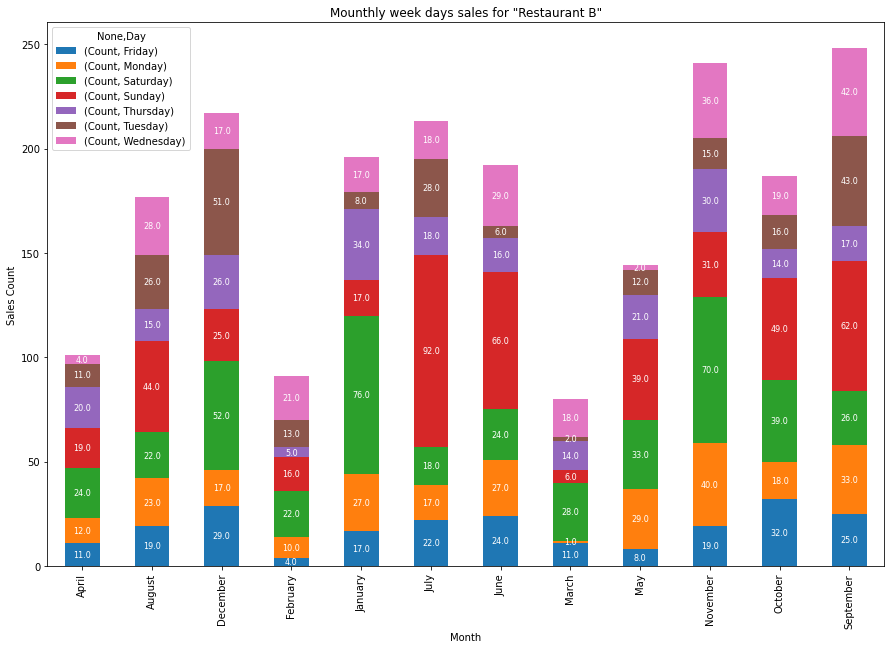

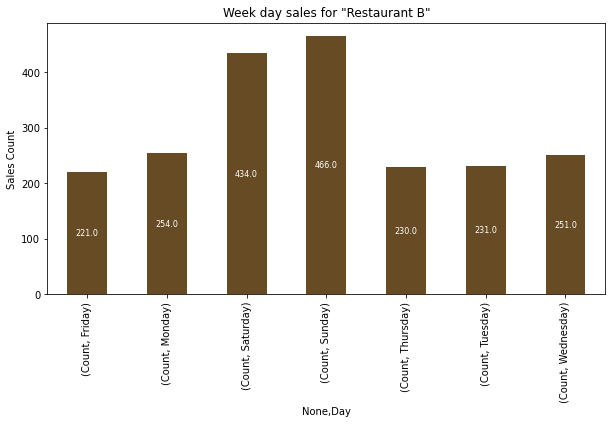

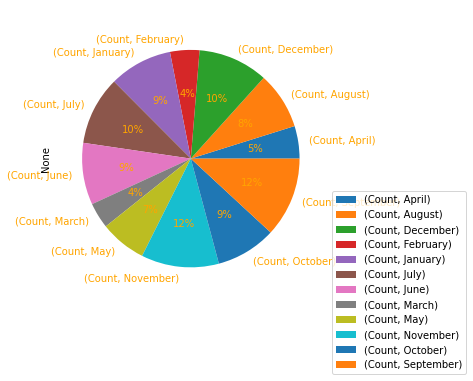

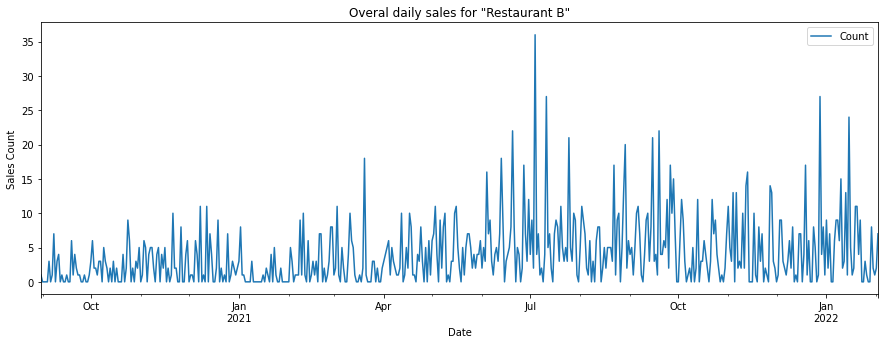

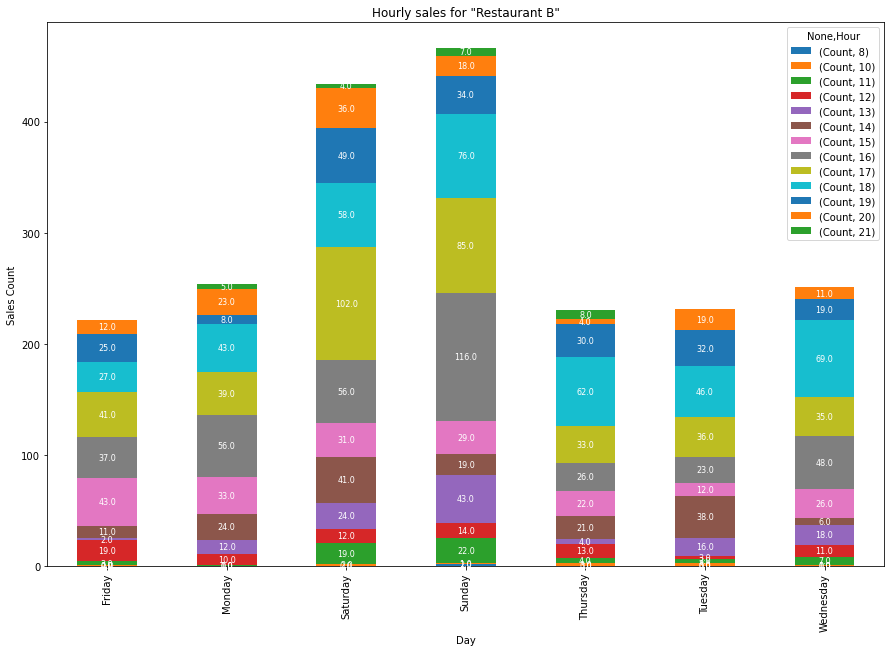

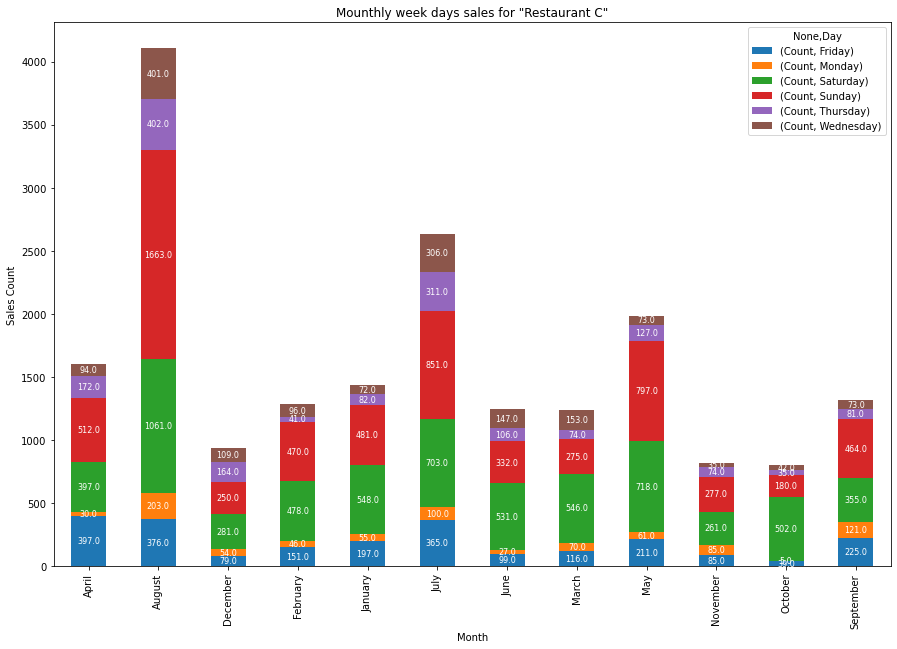

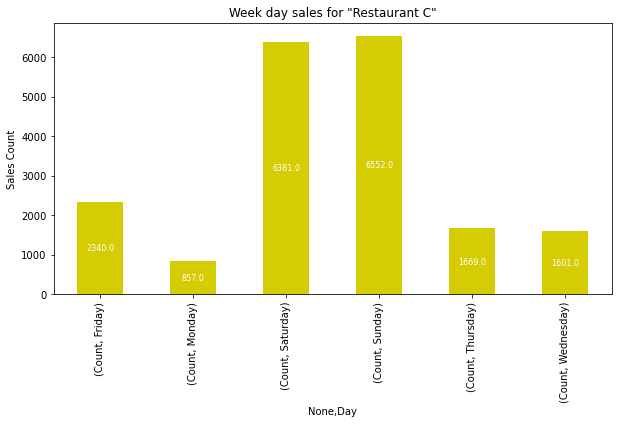

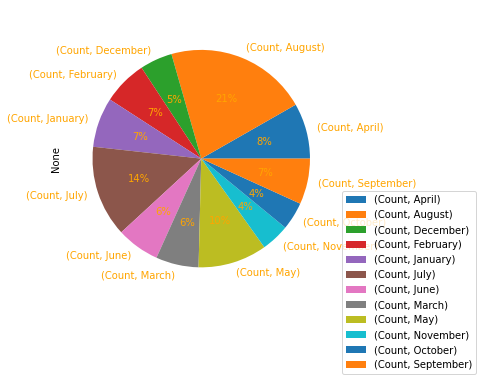

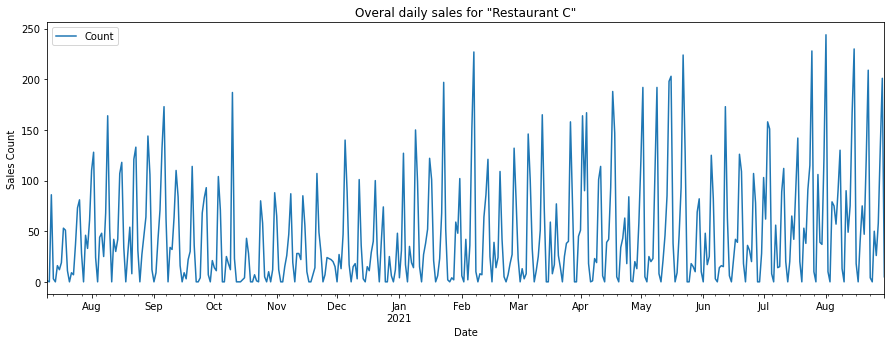

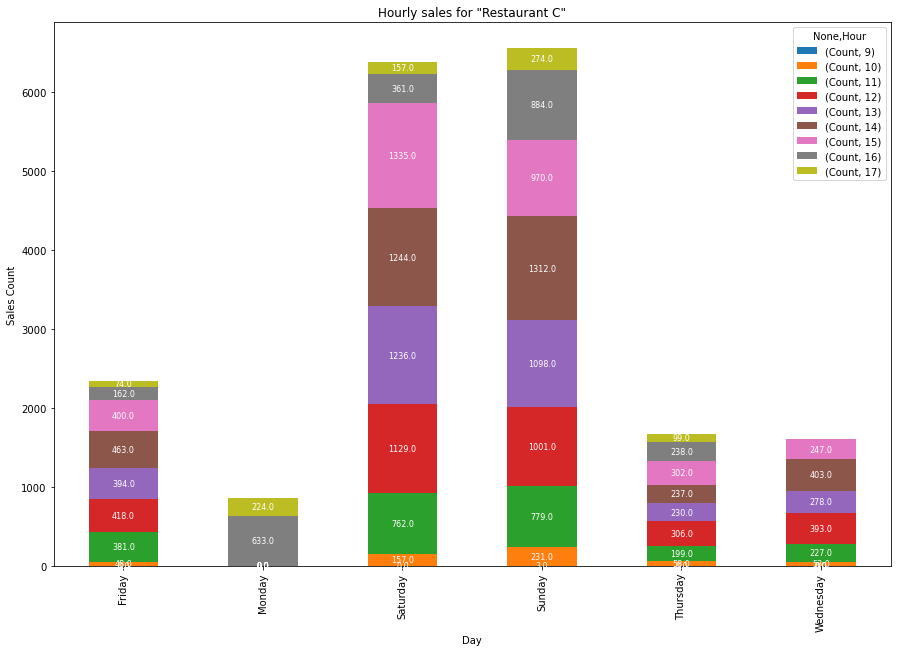

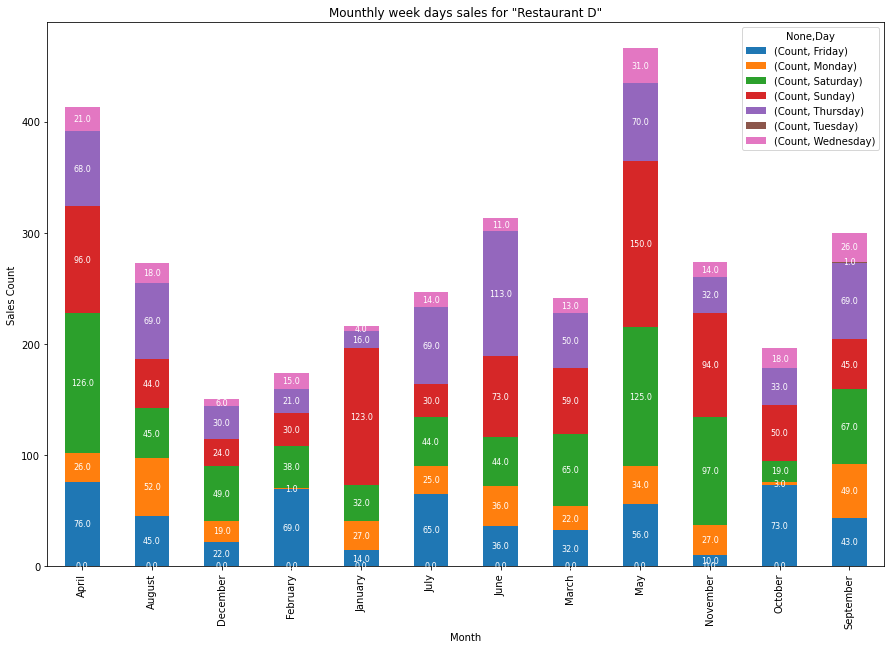

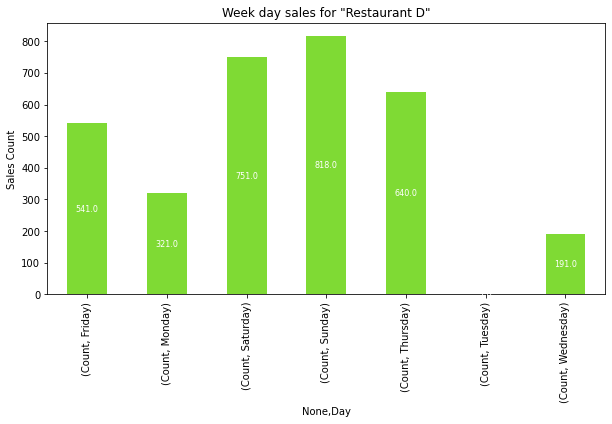

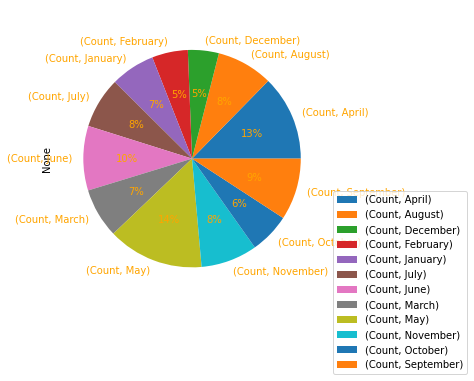

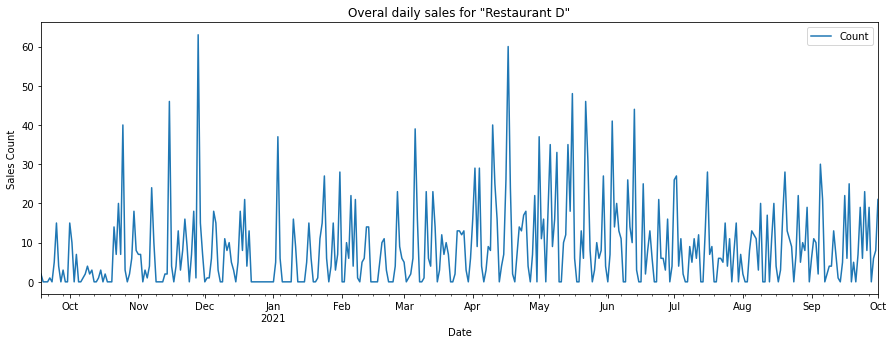

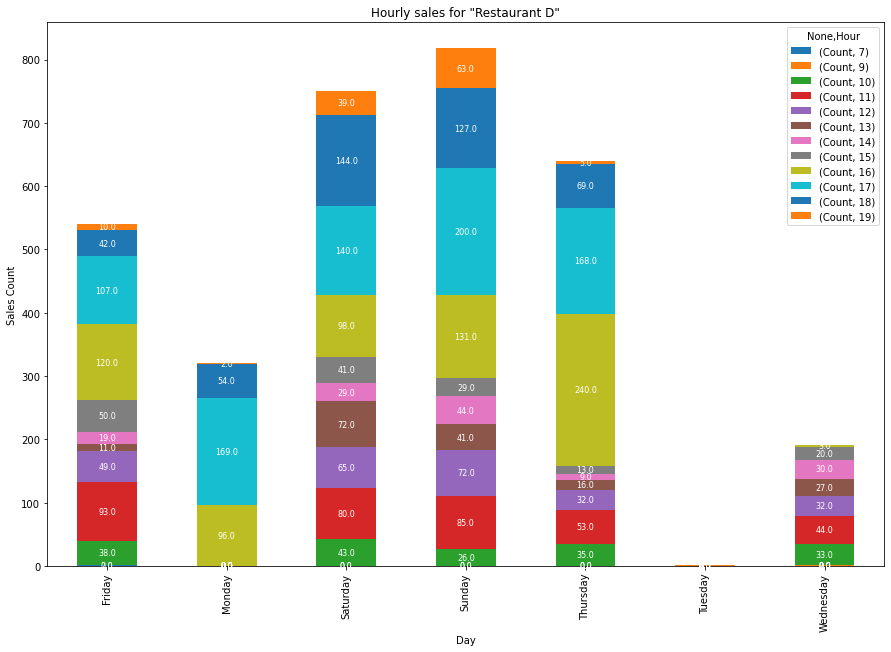

In [47]:
# first visualize weekdays sales:
rest_name = ['A','B','C','D']

for i in range(len(res_list)):

    rgb = (random.random(), random.random(), random.random())

    weekday_sales_res = res_list[i].groupby(['Month','Day'])[['Count']].sum()
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_ylabel('Sales Count')
    ax.set_title('Mounthly week days sales for \"Restaurant ' + rest_name[i] + "\"")
    weekday_sales_res.unstack().plot(kind ='bar',ax=ax,stacked=True)
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize = 8, color = 'w')

    daily_sales_res = res_list[i].groupby(['Day'])[['Count']].sum()
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_ylabel('Sales Count')
    ax.set_title('Week day sales for \"Restaurant ' + rest_name[i] + "\"")
    daily_sales_res.unstack().plot(kind ='bar',ax=ax,stacked=True, color = [rgb])
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize = 8 , color = 'w')    

    
    monthly_sales_res = res_list[i].groupby('Month')[['Count']].sum()
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_ylabel('Sales Count')
    ax.set_title('Monthly Sales for \"Restaurant ' + rest_name[i] + "\"", color ='w')
 
    monthly_sales_res.unstack().plot(kind ='pie',ax=ax ,autopct='%1.0f%%',textprops=dict(color="orange"))
    plt.legend(loc="upper left",bbox_to_anchor=(1,0.4))

    
   
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_ylabel('Sales Count')
    ax.set_title('Overal daily sales for \"Restaurant ' + rest_name[i] + "\"")
    res_list[i].resample('D')[['Count']].sum().plot(ax = ax)



    hourly_sales_res = res_list[i].groupby(['Day','Hour'])[['Count']].sum()
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_ylabel('Sales Count')
    ax.set_title('Hourly sales for \"Restaurant ' + rest_name[i] + "\"")
    hourly_sales_res.unstack().plot(kind ='bar',ax=ax,stacked=True)
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize = 8 , color = 'w')

